In [5]:
library(ggsankey)

library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
t1 <- sample(paste("Hosp", letters), size = 100, replace=TRUE)
t2 <- sample(x = c("Male", "Female")   , size = 100, replace=TRUE)
t3 <- floor(runif(100, min = 0, max = 110))
t4 <- sample(x = c("Survived", "Died") , size = 100, replace=TRUE)
t5  <- sample(paste("Facility ", letters), size = 100, replace=TRUE)

d <- data.frame(cbind(t1,t2,t3,t4, t5))
names(d) <- c('Hospital', 'Gender', 'AgeYears', 'Outcome', 'Dischargeto')

In [2]:
d$AgeYears <- as.integer(d$AgeYears)
d$AgeGroup <- cut(d$AgeYears, 
                  breaks = c(-Inf
                             ,5 ,10 ,15,20,25,30,35,40,45,50,55,60 ,65,70,75,80,85
                             , Inf), 
                  
                  labels = c("0-4 years"
                             ,"5-9 years","10-14 years","15-19 years","20-24 years"
                             ,"25-29 years","30-34 years","35-39 years","40-44 years"
                             ,"45-49 years","50-54 years","55-59 years","60-64 years"
                             ,"65-69 years","70-74 years","75-79 years","80-84 years"
                             ,"85+ years"),
                  right = FALSE)

In [3]:
head(d)

,Hospital,Gender,AgeYears,Outcome,Dischargeto,AgeGroup
,<chr>,<chr>,<int>,<chr>,<chr>,<fct>
1,Hosp l,Male,78,Died,Facility e,75-79 years
2,Hosp w,Female,65,Survived,Facility b,65-69 years
3,Hosp h,Male,109,Died,Facility j,85+ years
4,Hosp p,Male,105,Survived,Facility l,85+ years
5,Hosp e,Female,78,Survived,Facility f,75-79 years
6,Hosp j,Female,75,Died,Facility a,75-79 years


In [6]:
# Step 1
df <- d %>%
  make_long(Hospital, Gender,AgeGroup, Outcome,Dischargeto)
head(df)

Warning message:
“attributes are not identical across measure variables; they will be dropped”


x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Hospital,Hosp l,Gender,Male
Gender,Male,AgeGroup,75-79 years
AgeGroup,75-79 years,Outcome,Died
Outcome,Died,Dischargeto,Facility e
Dischargeto,Facility e,NA,NA
Hospital,Hosp w,Gender,Female


In [ ]:
# Step 2
dagg <- df%>%
  dplyr::group_by(node)%>%
  tally()

In [ ]:



# Step 3
df2 <- merge(df, dagg, by.x = 'node', by.y = 'node', all.x = TRUE)

In [ ]:


# Chart
pl <- ggplot(df2, aes(x = x
                      , next_x = next_x
                      , node = node
                      , next_node = next_node
                      , fill = factor(node)
                      , label = paste0(node," n=", n)
)
) 
pl <- pl +geom_sankey(flow.alpha = 0.5, node.color = "black",show.legend = TRUE)
pl <- pl +geom_sankey_text(size = 2, color = "blue", hjust = -0.5)
#pl <- pl +geom_sankey_label(size = 2, color = "black", fill= "white", hjust = -0.1)
pl <- pl +  theme_bw()
pl <- pl + theme_sankey(base_size = 16) 
pl <- pl + theme(legend.position = "none")
pl <- pl + labs(title = "Sankey diagram using ggplot")
pl <- pl + labs(subtitle = "using David Sjoberg's ggsankey package")
pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')

pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())

pl <- pl + scale_fill_viridis_d(option = "inferno")
pl

In [7]:
t1 <- sample(x = c("Hosp A", "Hosp B", "Hosp C","Hosp D") , size = 100, replace=TRUE)
t2 <- sample(x = c("Male", "Female")   , size = 100, replace=TRUE)
t3 <- sample(x = c("Survived", "Died") , size = 100, replace=TRUE)

d <- data.frame(cbind(t1,t2,t3))
names(d) <- c('Hospital', 'Gender',  'Outcome')
TotalCount = nrow(d)

In [8]:
head(d)

,Hospital,Gender,Outcome
,<chr>,<chr>,<chr>
1,Hosp B,Female,Survived
2,Hosp C,Male,Died
3,Hosp C,Female,Died
4,Hosp C,Female,Died
5,Hosp B,Female,Survived
6,Hosp D,Male,Survived


In [9]:
# Step 1
df <- d %>%
  make_long(Hospital, Gender, Outcome)
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Hospital,Hosp B,Gender,Female
Gender,Female,Outcome,Survived
Outcome,Survived,NA,NA
Hospital,Hosp C,Gender,Male
Gender,Male,Outcome,Died
Outcome,Died,NA,NA


In [10]:
# Step 2
dagg <- df%>%
  dplyr::group_by(node)%>%
  tally()
head(dagg)

node,n
<chr>,<int>
Died,56
Female,56
Hosp A,22
Hosp B,20
Hosp C,30
Hosp D,28


In [11]:
dagg <- dagg%>%
  dplyr::group_by(node)%>%
  dplyr::mutate(pct = n/TotalCount)
head(dagg)

node,n,pct
<chr>,<int>,<dbl>
Died,56,0.56
Female,56,0.56
Hosp A,22,0.22
Hosp B,20,0.20
Hosp C,30,0.30
Hosp D,28,0.28


In [12]:
# Step 3
df2 <- merge(df, dagg, by.x = 'node', by.y = 'node', all.x = TRUE)
head(df2)

,node,x,next_x,next_node,n,pct
,<chr>,<fct>,<fct>,<chr>,<int>,<dbl>
1,Died,Outcome,NA,NA,56,0.56
2,Died,Outcome,NA,NA,56,0.56
3,Died,Outcome,NA,NA,56,0.56
4,Died,Outcome,NA,NA,56,0.56
5,Died,Outcome,NA,NA,56,0.56
6,Died,Outcome,NA,NA,56,0.56


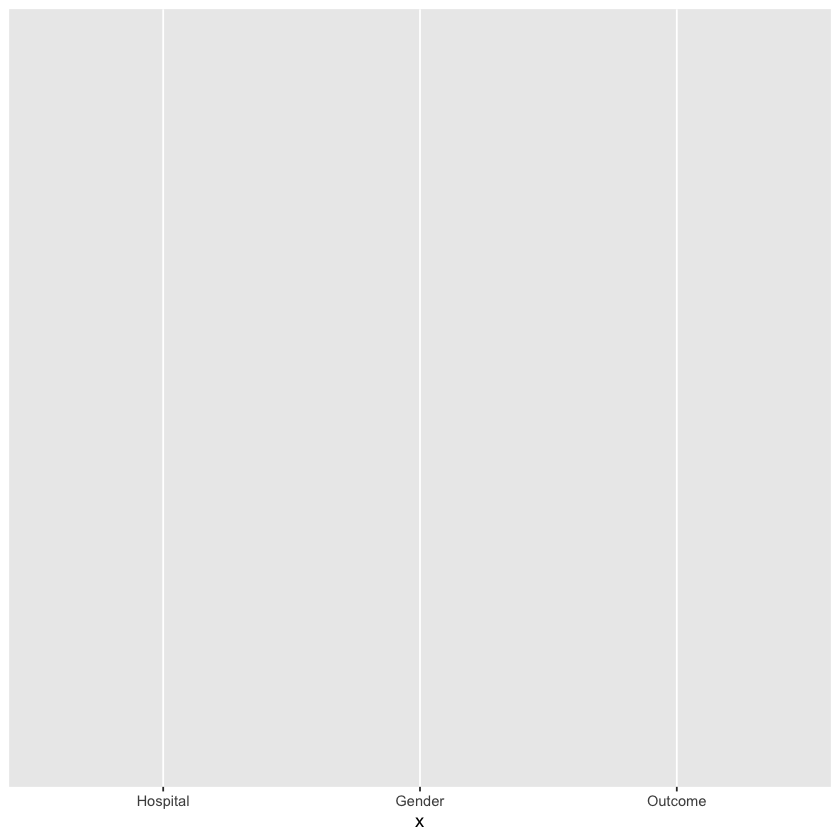

In [15]:
pl <- ggplot(df2, aes(x = x
                      , next_x = next_x
                      , node = node
                      , next_node = next_node
                      , fill = factor(node)
                      
                      , label = paste0(node," n=", n, '(',  round(pct* 100,1), '%)' ))
             )
pl

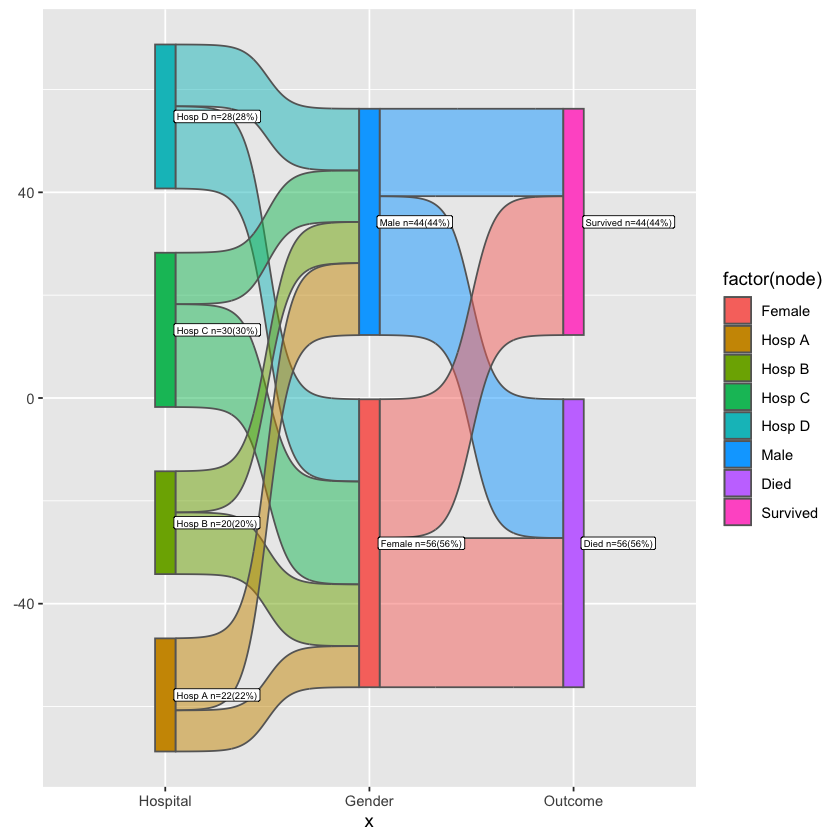

In [16]:
pl <- pl +geom_sankey(flow.alpha = 0.5,  color = "gray40", show.legend = TRUE)
  pl <- pl +geom_sankey_label(size = 2, color = "black", fill= "white", hjust = -0.1)
pl

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


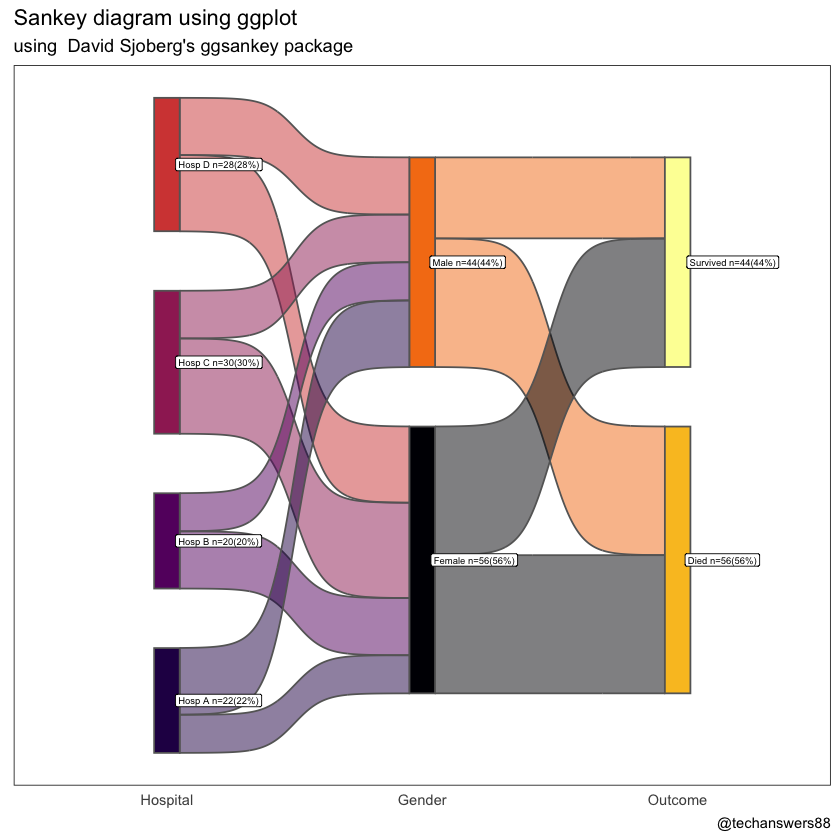

In [17]:


pl <- pl +  theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl <- pl + labs(title = "Sankey diagram using ggplot")
pl <- pl + labs(subtitle = "using  David Sjoberg's ggsankey package")
pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl